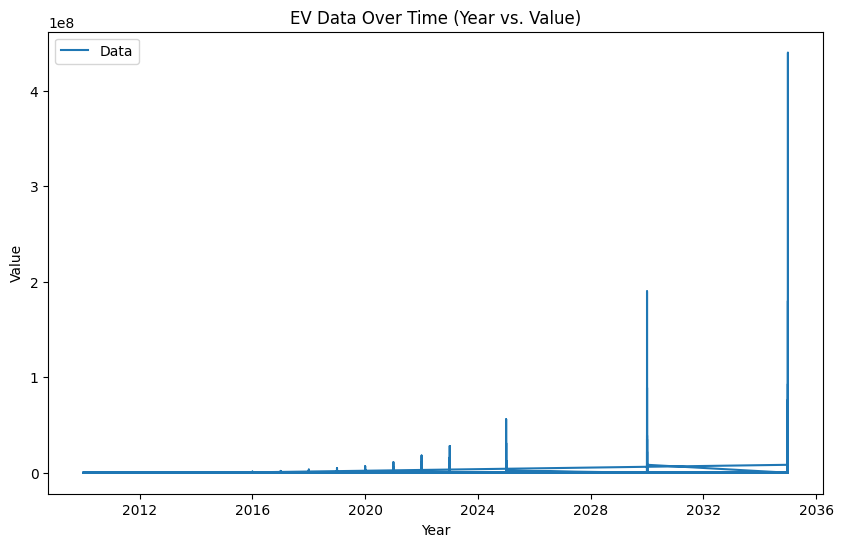

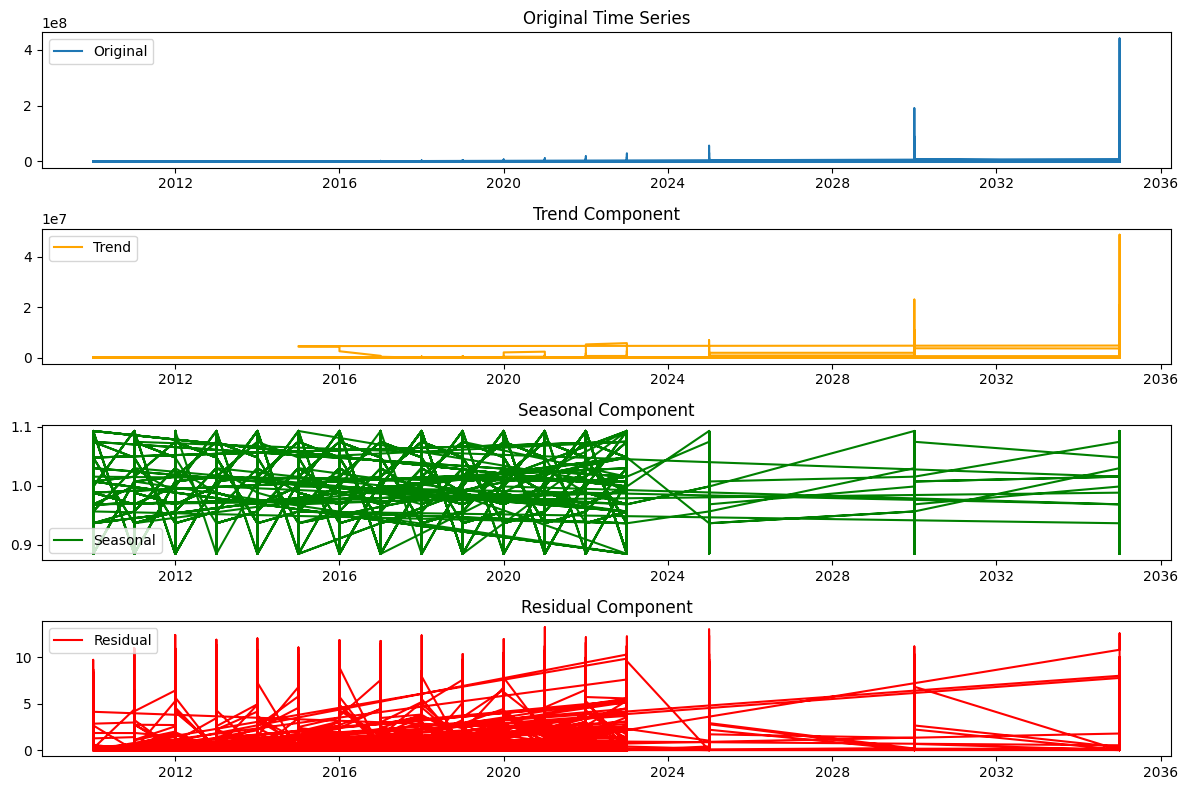

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset (replace with your file path if needed)
data = pd.read_csv('ev.csv')

# Extract the relevant columns: 'year' and 'value'
data_filtered = data[['year', 'value']].dropna()

# Convert 'year' to datetime to handle it as a time series
data_filtered['year'] = pd.to_datetime(data_filtered['year'], format='%Y')
data_filtered.set_index('year', inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data_filtered['value'], label='Data')
plt.title('EV Data Over Time (Year vs. Value)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# Performing seasonal decomposition
period = 12  # Assuming yearly seasonality for now
result = seasonal_decompose(data_filtered['value'], model='multiplicative', period=period)

# Plotting the decomposed components
plt.figure(figsize=(12, 8))

# Original data
plt.subplot(4, 1, 1)
plt.plot(data_filtered['value'], label='Original')
plt.title('Original Time Series')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()
